# Exercise: Root Finding 2
**강좌**: *Numerical Analysis*

**Due**: 2024/10/8

## Problem #1
Write a function to find a root using the Newton method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * function *f*
   * derivative *fp*
   * intial guess: x0
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [1]:
# Write your answer
def newton(f, fp, x0, tol=1e-6, iter_max=50):
    '''
    f : function
      함수
    fp : function
      f의 미분한 함수
    x0 : float
      inital guess
    tol : float
      tolerance
    iter_max : int
      iteration maxium
    '''
    #초기값이 해일 경우
    if f(x0) == 0 :
      print(f'Converged at {x0} ')
      return x0

    #초기값을 기울기가 0 이면 안됨
    elif fp(x0) != 0 :
      for i in range(iter_max) :
        x1 = x0 - (f(x0)/fp(x0))
        eps_a = abs(x1 - x0) / max(abs(x1), tol)
        x0 = x1
        if fp(x0) == 0 :
          raise ValueError('Wrong guess')

        elif eps_a < tol :
          print(f'Converged at {x1}')
          return x1

    else :
      raise ValueError('Wrong Initial Guess')

In [2]:
import numpy as np
f = lambda x : x**2 + 10*np.sin(x)
fp = lambda x: 2*x + 10*np.cos(x)

assert abs(newton(f, fp, x0=-4) - (-2.47948)) < 5e-5
assert abs(newton(f, fp, x0=-1) - (0.0)) < 1e-6
assert abs(newton(f, fp, x0=0)- (0.0)) < 1e-6

Converged at -2.479481833541344
Converged at 0.0
Converged at 0 


## Problem #2
Write a function to find a root using the Secant method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * function *f*
   * intial guesses: $x_0$, $x_{-1}$
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [3]:
# Write your answer
def secant(f, x0, x1, tol=1e-6, iter_max=50):
    '''
    f : function
      함수
    x0 : float
      initial guess
    x1 : float
      initial guess
    tol : float
      tolerance
    iter_max : int
      interaion maxium
    '''
    #초기값과 이전값의 함수값이 같으면 다음값을 정의할 수 없음
    if f(x0)-f(x1) == 0:
      raise ValueError('Wrong Initial Guess')

    #초기값이 해인 경우
    elif f(x1) == 0 :
      print(f'Converged at {x1} ')
      return x1

    #이전값이 해인 경우
    elif f(x0) == 0 :
      print(f'Coverged at {x0}')
      return x0

    else :
      for i in range(iter_max) :
        xn = x1 -f(x1)*(x1-x0)/(f(x1)-f(x0))
        eps_a = abs(xn-x1)/max(abs(xn),tol)
        x0 = x1
        x1 = xn
        if eps_a < tol :
          print(f'Converged at {xn}')
          return xn

In [4]:
f = lambda x : x**2 + 10*np.sin(x)

assert abs(secant(f, x0=-4, x1=-5) - (-2.47948)) < 5e-5
assert abs(secant(f, x0=-1, x1=-1.1) - (0.0)) < 1e-6
assert abs(secant(f, x0=0, x1=-1)- (0.0)) < 1e-6

Converged at -2.479481833541029
Converged at -6.232790782523192e-32
Coverged at 0


# Problem #3
Determine the highest real root of

$$
f(x) = 2x^3 - 11.7x^2 + 17.7x - 5
$$

(a) Graphically.

(b) Newton-Raphson method with $x_0 = 3$.

(c) Secant method with $x_{-1}=3, x_0=4$.

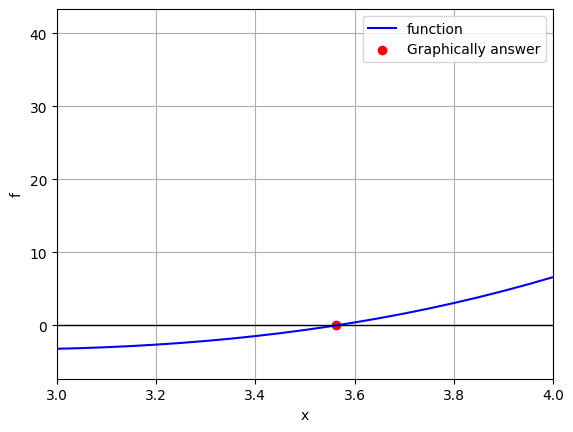

In [5]:
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

f = lambda x : 2*x**3 - 11.7*x**2 + 17.7*x -5
fp = lambda x : 6*x**2 - 2*11.7*x +17.7

x = np.linspace(0,5,101)

plt.plot(x,f(x),color = 'b')
plt.scatter(3.563160824859791,f(3.563160824859791), color ='r')
plt.axhline(0, color='black',linewidth=1)
plt.legend(['function','Graphically answer'])
plt.xlim(3,4)
plt.xlabel('x')
plt.ylabel('f')
plt.grid(True)
plt.show()


In [6]:
# Write your answers (b)
# Save the result in ans_b
# Write your answer
def newton(f, fp, x0, tol=1e-6, iter_max=50):
    '''
    f : function
      함수
    fp : function
      f의 미분한 함수
    x0 : float
      inital guess
    tol : float
      tolerance
    iter_max : int
      iteration maxium
    '''
   #초기값이 해일 경우
    if f(x0) == 0 :
      print(f'Converged at {x0} ')
      return x0

    #초기값을 기울기가 0 이면 안됨
    elif fp(x0) != 0 :
      for i in range(iter_max) :
        x1 = x0 - (f(x0)/fp(x0))
        eps_a = abs(x1 - x0) / max(abs(x1), tol)
        x0 = x1
        if fp(x0) == 0 :
          raise ValueError('Wrong guess')

        elif eps_a < tol :
          print(f'Converged at {x1}')
          return x1

    else :
      raise ValueError('Wrong Initial Guess')

ans_b = newton(f, fp, x0 = 3)

Converged at 3.5631608248635556


In [ ]:
# Do not remove!!!

In [7]:
# Write your answers (c)
# Save the result in ans_c

# YOUR CODE HERE
def secant(f, x0, x1, tol=1e-6, iter_max=50):
    '''
    f : function
      함수
    x0 : float
      initial guess
    x1 : float
      initial guess
    tol : float
      tolerance
    iter_max : int
      interaion maxium
    '''
     #초기값과 이전값의 함수값이 같으면 다음값을 정의할 수 없음
    if f(x0)-f(x1) == 0:
      raise ValueError('Wrong Initial Guess')

    #초기값이 해인 경우
    elif f(x1) == 0 :
      print(f'Converged at {x1} ')
      return x1

    #이전값이 해인 경우
    elif f(x0) == 0 :
      print(f'Coverged at {x0}')
      return x0

    else :
      for i in range(iter_max) :
        xn = x1 -f(x1)*(x1-x0)/(f(x1)-f(x0))
        eps_a = abs(xn-x1)/max(abs(xn),tol)
        x0 = x1
        x1 = xn
        if eps_a < tol :
          print(f'Converged at {xn}')
          return xn
ans_c = secant(f, x0 = 3, x1 = 4)

Converged at 3.563160824859791


In [ ]:
# Do not remove!!!

## Problem #4
Aerospace engineers sometimes compute the trajectories of projectiles like rockets. A related problem deals with the trajectory of a
thrown ball. The trajectory of a ball is defi ned by the (x, y) coordinates. The trajectory can be modeled as
$$
y = \tan(\theta_0)x - \frac{g}{2v_0^2\cos^2\theta_0} x^2+y_0
$$
Find the appropriate initial angle $\theta_0$, if the initial velocity $v_0=20m/s$ and the disctance to the catcher $x$ is $40m$. Note that the ball leaves the thrower’s hand at an elevation of $y_0=1.8 m$ and and the catcher receives it at $1m$. Express the fi nal result in degrees. Use a value of $9.81m/s^2$ for $gG.

(a) Graphically and determine the initial guess

(b) Secant method

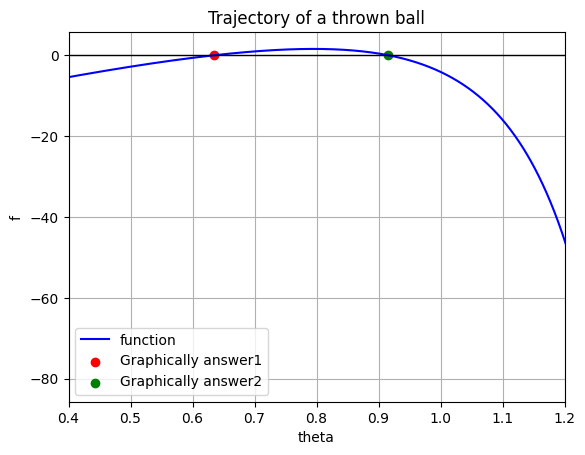

In [8]:
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

v0 = 20
x_dis = 40
y0 = 1.8
y = 1
g = 9.81

x = np.linspace(0, np.pi/2.5, 1000) #tan 함수의 증가율이 pi/2 근처로 갈수록 급격하게 커지므로 그 근처의 값을 설정함.
f = lambda t : x_dis*np.tan(t) - (g*x_dis**2)/(2*v0**2*np.cos(t)**2) + (y0-y)

plt.plot(x, f(x), color = 'b') #함수의 개형을 그림
plt.scatter(0.634952129853159, f(0.634952129853159), color = 'r')
plt.scatter(0.9158471871916733283, f(0.9158471871916733283),  color = 'g')
plt.legend(['function', 'Graphically answer1', 'Graphically answer2'])
plt.xlim(0.4,1.2)
plt.axhline(0, color='black',linewidth=1)
plt.xlabel('theta')
plt.ylabel('f')
plt.title('Trajectory of a thrown ball')
plt.grid(True)

#determine the initial guess
x0, x1 = 0.4, 0.8

In [9]:
# Write your answers (b)
# Save the result in ans_b

def secant(f, x0, x1, tol=1e-6, iter_max=50):
    '''
    f : function
      함수
    x0 : float
      initial guess
    x1 : float
      initial guess
    tol : float
      tolerance
    iter_max : int
      interaion maxium
    '''
     #초기값과 이전값의 함수값이 같으면 다음값을 정의할 수 없음
    if f(x0)-f(x1) == 0:
      raise ValueError('Wrong Initial Guess')

    #초기값이 해인 경우
    elif f(x1) == 0 :
      print(f'Converged at {x1} ')
      return x1

    #이전값이 해인 경우
    elif f(x0) == 0 :
      print(f'Coverged at {x0}')
      return x0

    else :
      for i in range(iter_max) :
        xn = x1 -f(x1)*(x1-x0)/(f(x1)-f(x0))
        eps_a = abs(xn-x1)/max(abs(xn),tol)
        x0 = x1
        x1 = xn
        if eps_a < tol :
          print(f'Converged at {xn}')
          return xn
ans_b = 180/np.pi*secant(f, x0 , x1) #deg로 저장함.
print(ans_b)

Converged at 0.6349522535674004
36.38008432173251


In [ ]:
# Do not remove!!!